In [1]:
import os
os.chdir('/home/149/ab8992/cosima_regional/development/regional-mom6')
# from recipes import surfacespeed
from importlib import reload
# import ttidelib as tt
# from ttidelib import logmsg
import shutil
import subprocess
import dask
import xarray as xr
from matplotlib import pyplot as plt
from dask.distributed import Client, default_client
from pathlib import Path
import sys
# sys.path.append('/home/149/ab8992/cosima_regional/development/regional-mom6/regional_mom6')
import regional_mom6 as rm
try:
    # Try to get the existing Dask client
    client = default_client()
except ValueError:
    # If there's no existing client, create a new one
    client = Client()

client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33753,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:45615,Total threads: 4
Dashboard: /proxy/46271/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:45625,


# There seem to be some problems with the ERA5 dataset
The full-20th model was able to run at DT=500 up until November 1. It then crashes on November 3-4. This happens:
* When wind forcing is turned off
* When all forcing is turned off

It looks like era5 extreme values aren't the problem. It's to do with radiative flux or lack thereof causing the ocean to freeze 

In [2]:
era5 = xr.open_mfdataset("/g/data/nm03/ab8992/ttide-inputs/era5/10year/*")
erasubset = era5.sel(time=slice("2013-10-13", "2013-10-13"))

# Iterate over all variables in erasubset and print the maximum, minimum values and the timestamp at which they occur. Also print whether it contains NaNs or not
# Instead of printing min and max values, print min and max standard deviations from the mean

topog =  xr.open_mfdataset("/g/data/nm03/ab8992/ttide-inputs/full-20/topog.nc")

# for var in erasubset:
#     print(var)
#     high = erasubset[var].max().values
#     low = erasubset[var].min().values
#     print("Maximum value: ", high)
#     print("Minimum value: ", low)
#     print("Mean value: ", erasubset[var].mean().values)
#     std = erasubset[var].std().values
#     mean = erasubset[var].mean().values
#     print("Maximum standard deviation from the mean: ", (high - mean) / std)
#     print("Minimum standard deviation from the mean: ", (low - mean) / std)
#     print("Time of maximum value: ", erasubset[var].where(erasubset[var] == high, drop=True).time.values[0].strftime("%d %H"))
#     print("Time of minimum value: ", erasubset[var].where(erasubset[var] == low, drop=True).time.values[0].strftime("%d %H"))
#     print("Contains NaNs: ", erasubset[var].isnull().any().values)
#     print("")


In [21]:
erasubset.time.values

array([cftime.DatetimeJulian(2012, 4, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 1, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 2, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 3, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 4, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 5, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 6, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 7, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 8, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 9, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 10, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 11, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2012, 4, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.Datetime

In [4]:
erasubset.sel(latitude=lat, longitude=lon, method='nearest')

NameError: name 'lat' is not defined

<Figure size 640x480 with 0 Axes>

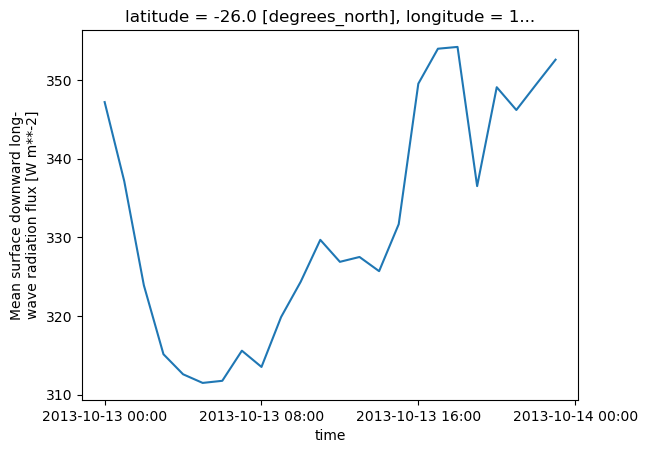

<Figure size 640x480 with 0 Axes>

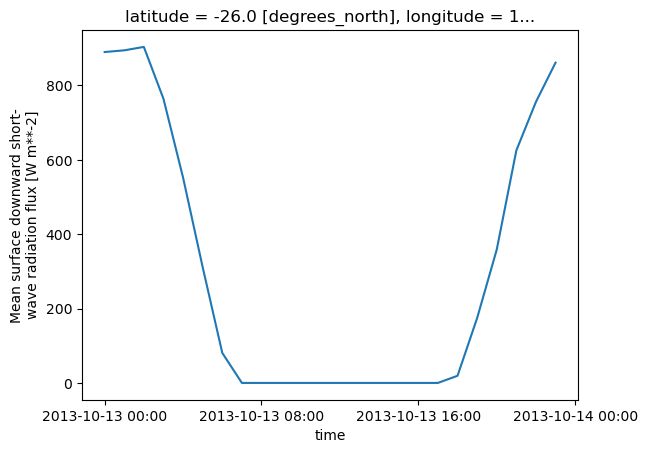

<Figure size 640x480 with 0 Axes>

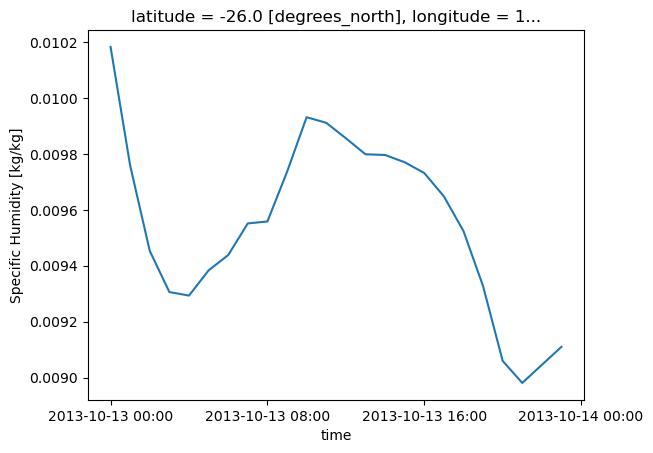

<Figure size 640x480 with 0 Axes>

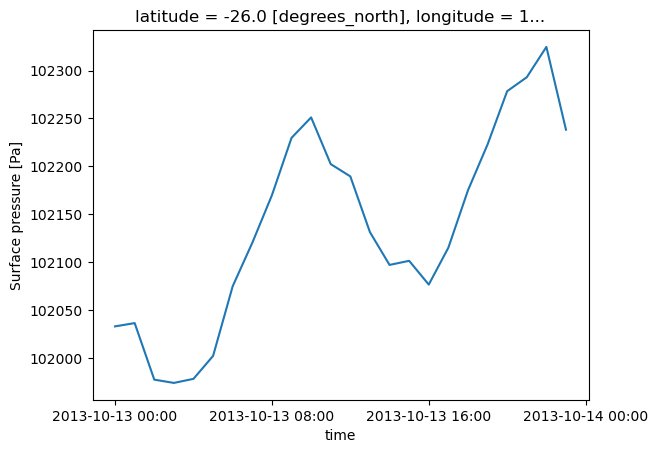

<Figure size 640x480 with 0 Axes>

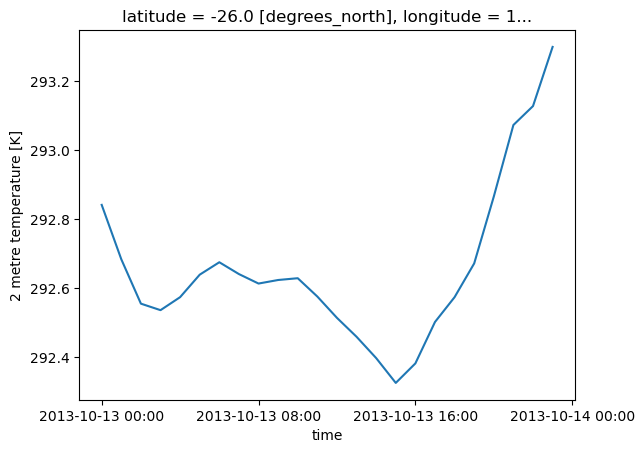

<Figure size 640x480 with 0 Axes>

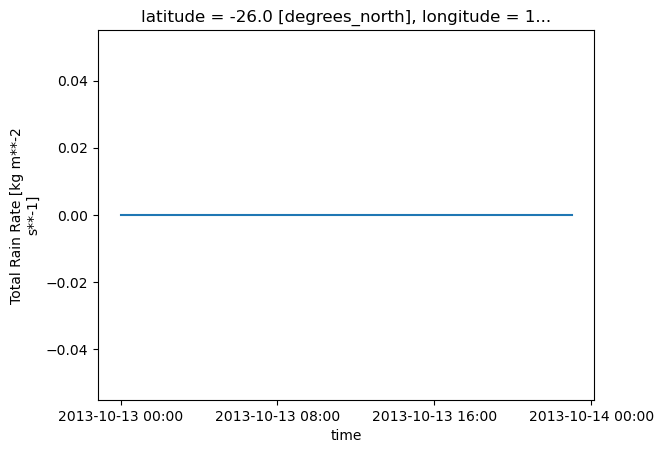

<Figure size 640x480 with 0 Axes>

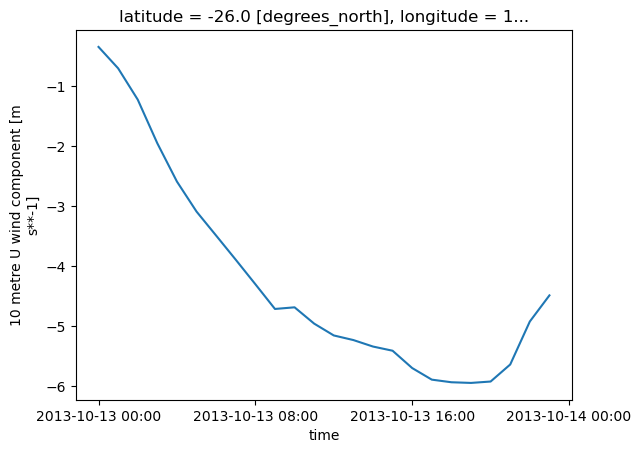

<Figure size 640x480 with 0 Axes>

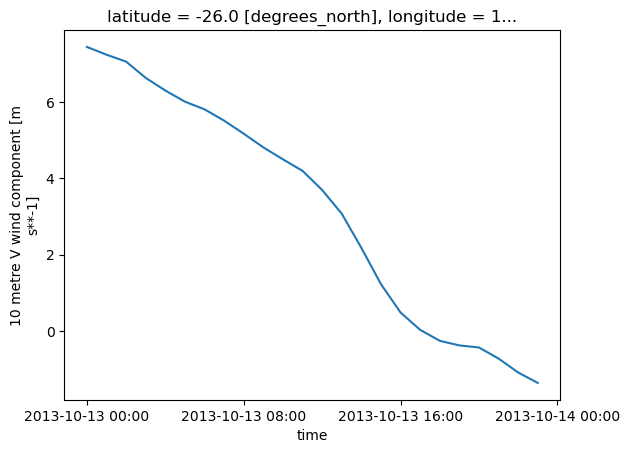

In [3]:
lat = topog.ny[127].values
lon = topog.nx[470].values

for var in erasubset.data_vars:
    plt.clf()
    plt.figure()
    erasubset.sel(latitude=lat, longitude=lon, method='nearest')[var].plot()
    plt.show()

In [42]:
topog

<xarray.Dataset>
Dimensions:  (ntiles: 1, ny: 795, nx: 760)
Coordinates:
    zi       float64 ...
Dimensions without coordinates: ntiles, ny, nx
Data variables:
    depth    (ntiles, ny, nx) float64 dask.array<chunksize=(1, 795, 760), meta=np.ndarray>
Attributes:
    depth:          meters
    standard_name:  topographic depth at T-cell centers

[[[1907.06516259 1121.62530928  367.10709358  185.33991572  158.65545958
    138.04331996  112.67935672  186.31334201  210.13488959  168.64938855]
  [1437.27940653  819.85319067   88.25748022   87.92387812  106.82065038
     99.28970846   76.21842371   99.49755232  139.20868124  163.05091731]
  [1787.65488859 1343.04910969  587.17689496   17.5665533    61.06300562
     66.66851386   50.17447663   17.41031282   84.77316621  117.55080843]
  [2674.93029762 2042.50515134 1154.71108253  268.91081893   16.08033929
     51.73828524   40.33096954   15.37349491  165.2902039   193.17977246]
  [2984.08520988 2452.6989516  1692.71610238  858.62929708  231.27663439
             nan   17.83100457   92.77061216  357.19274833  454.87905234]
  [3158.18076342 2826.1286955  2366.72131878 1672.89535585  731.90430052
     16.23155747           nan  152.48917792  524.54253764  759.65122906]
  [3361.71957283 3190.72103473 2931.17581748 2396.2686994  1481.11847966
    578.64558033  340.35160248  476.89273965 

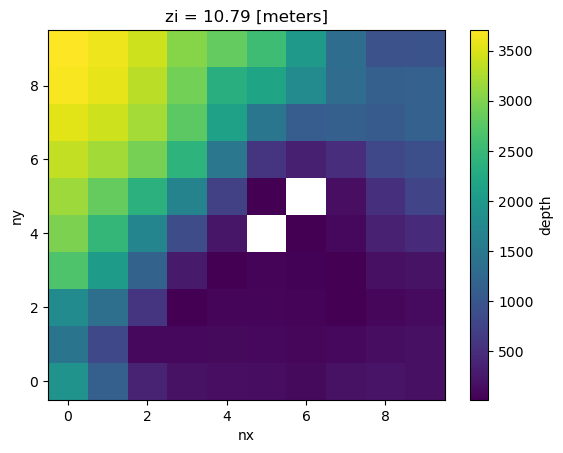

In [6]:
# print(topog.isel(ny=740, nx=233).depth.values)
#print values within 2 of 740 and 233
# print(topog.isel(ny=slice(738, 742), nx=slice(231, 235)).depth.values)
%matplotlib inline
topog.isel(ny=slice(lat - 5, lat + 5), nx=slice(lon - 5, lon + 5)).depth.plot()

print(topog.isel(ny=slice(lat - 5, lat + 5), nx=slice(lon - 5, lon + 5)).depth.values)
print(topog.isel(ny=lat, nx=lon).depth.values)



### BECAUSE OF HALO POINTS ARE OFF BY 2!!!


In [72]:
topog

<xarray.Dataset>
Dimensions:  (ntiles: 1, ny: 795, nx: 760)
Coordinates:
    zi       float64 ...
Dimensions without coordinates: ntiles, ny, nx
Data variables:
    depth    (ntiles, ny, nx) float64 dask.array<chunksize=(1, 795, 760), meta=np.ndarray>
Attributes:
    depth:          meters
    standard_name:  topographic depth at T-cell centers

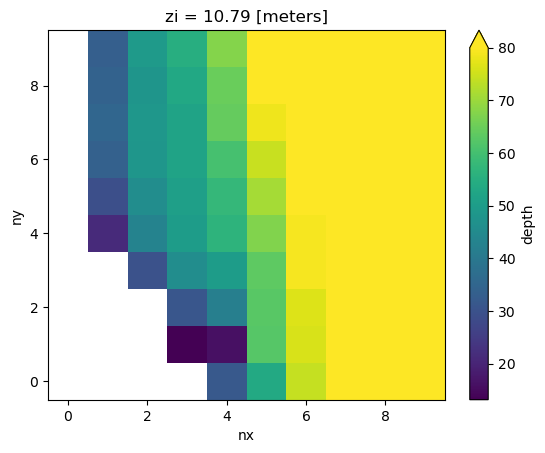

In [49]:
lat = topog.ny[740].values
lon = topog.nx[233].values

window = 5

topog.depth.isel(ny = slice(740 - window, 740 + window), nx = slice(233 - window, 233 + window)).plot(vmax = 80)
## Add a cross to the image at y = 740, x = 233

# plt.plot([233], [740], marker='x', markersize=50, color="red")

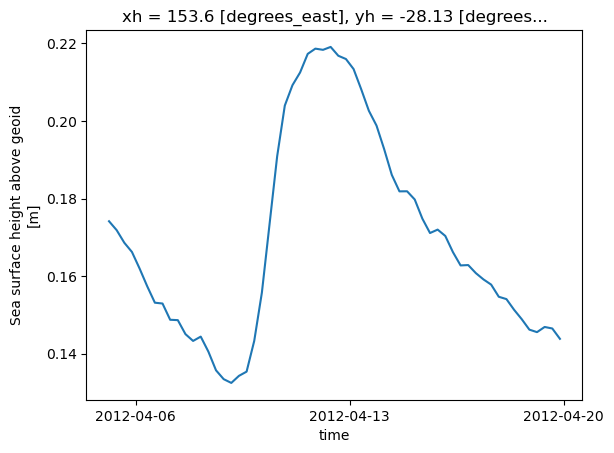

2024-01-29 15:40:58,864 - distributed.nanny - WARNING - Restarting worker
2024-01-29 15:40:58,955 - distributed.nanny - WARNING - Restarting worker
2024-01-29 15:40:59,258 - distributed.nanny - WARNING - Restarting worker
2024-01-29 15:41:00,263 - distributed.nanny - WARNING - Restarting worker


In [12]:
window = 2
notide = xr.open_dataset("/g/data/nm03/ab8992/outputs/notide-20/output055/surface.nc").isel(yh = 738, xh = 231,yq = 738, xq = 231)

# notide = xr.open_dataset("/g/data/nm03/ab8992/outputs/full-20/output054/surface.nc").isel(yh = 738, xh = 231,yq = 738, xq = 231)

notide.zos.plot()

# print(notide.time.values)
# for i in range(notide.time.size):
#     plt.clf()
#     plt.figure()
#     notide.zos.isel(time = i).plot()
#     plt.show()

# for var in ["zos","tos","speed","sss"]:
#     plt.clf()
#     plt.figure()
#     notide[var].isel(time = -1).plot()
#     plt.show()
# # notide.zos.isel(time = 3).plot()

In [62]:
notide = xr.open_dataset("/g/data/nm03/ab8992/outputs/notide-20/output054/surface.nc",decode_times=False).time.values
notide.time.values

array([], dtype=float64)

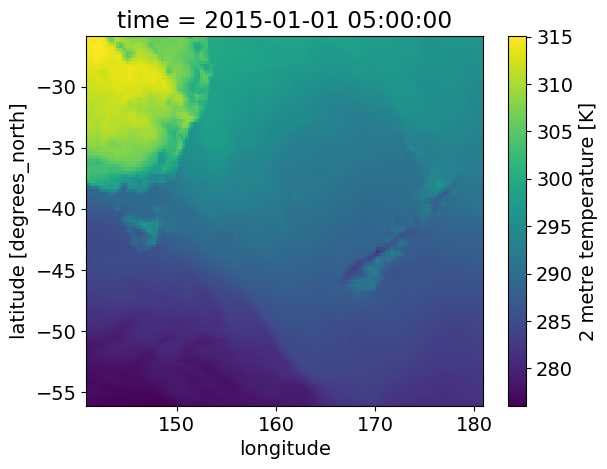

In [18]:
%matplotlib inline
plt.clf()
era5.t2m.isel(time = 5).plot()
plt.show()

## The issue was actually radiative flux! 
Redo era5 forcing including the lw and sw fluxes. Add these to the era5 folder 

In [2]:

## Choose your coordinates and the name of your experiment


yextent = [-56,-26]
xextent = [142,180]
expt_name = "full-20-newera5"

# 
daterange = ["2015-01-01 00:00:00", "2017-12-31 00:00:00"]

## Place where all your input files go
inputdir = f"/g/data/nm03/ab8992/ttide-inputs/{expt_name}/"

## Directory where you'll run the experiment from
rundir = f"/home/149/ab8992/tasman-tides/rundirs/{expt_name}/"

## Directory where raw downloads go before processing
tmpdir = f"/scratch/v45/ab8992/reanalysis_tmp/ttide-20"
# tmpdir = f"/home/149/ab8992/tasman-tides/rundirs/full-20/inputdir/forcing"
# tmpdir = "/home/149/ab8992/tasman-tides/rundirs/mkic/archive/output000/"
## Directory where fre tools are stored
toolpath = "/home/157/ahg157/repos/mom5/src/tools/" ## Compiled tools needed for construction of mask tables
for i in [rundir,tmpdir,inputdir]:
    if not os.path.exists(i):
        subprocess.run(f"mkdir {i} -p",shell=True)

expt = rm.experiment(
    xextent,
    yextent,
    daterange,
    0.05,  ## Resolution
    100,      ## #zlayers
    20,       ## dz ratio
    5500,    ## Max depth of ocean
    rundir,
    inputdir,
    toolpath
)

expt.setup_era5("/g/data/rt52/era5/single-levels/reanalysis")


0.3.0


In [7]:

## Choose your coordinates and the name of your experiment


yextent = [-56,-26]
xextent = [142,180]
expt_name = "full-20"

# 
daterange = ["2015-01-01 00:00:00", "2017-12-31 00:00:00"]

## Place where all your input files go
inputdir = f"/g/data/nm03/ab8992/ttide-inputs/{expt_name}/"

## Directory where you'll run the experiment from
rundir = f"/home/149/ab8992/tasman-tides/rundirs/{expt_name}/"

## Directory where raw downloads go before processing
tmpdir = f"/scratch/v45/ab8992/reanalysis_tmp/ttide-20"
# tmpdir = f"/home/149/ab8992/tasman-tides/rundirs/full-20/inputdir/forcing"
# tmpdir = "/home/149/ab8992/tasman-tides/rundirs/mkic/archive/output000/"
## Directory where fre tools are stored
toolpath = "/home/157/ahg157/repos/mom5/src/tools/" ## Compiled tools needed for construction of mask tables
for i in [rundir,tmpdir,inputdir]:
    if not os.path.exists(i):
        subprocess.run(f"mkdir {i} -p",shell=True)

expt = rm.experiment(
    xextent,
    yextent,
    daterange,
    0.05,  ## Resolution
    100,      ## #zlayers
    20,       ## dz ratio
    5500,    ## Max depth of ocean
    rundir,
    inputdir,
    toolpath
)

expt.topog = xr.open_dataset("/g/data/nm03/ab8992/ttide-inputs/full-20/topog.nc")
expt.FRE_tools(layout=(36,30))
expt.setup_run_directory


NOTE from make_solo_mosaic: there are 0 contacts (align-contact)
congradulation: You have successfully run make_solo_mosaic
MAKE SOLO MOSAIC

CompletedProcess(args='/home/157/ahg157/repos/mom5/src/tools/make_solo_mosaic/make_solo_mosaic --num_tiles 1 --dir . --mosaic_name ocean_mosaic --tile_file hgrid.nc', returncode=0)


cp: './ocean_mosaic.nc' and 'ocean_mosaic.nc' are the same file
cp: './hgrid.nc' and 'hgrid.nc' are the same file


cp ./hgrid.nc hgrid.nc 

NOTE from make_coupler_mosaic: the ocean land/sea mask will be determined by field depth from file topog.nc
mosaic_file is grid_spec.nc

***** Congratulation! You have successfully run make_quick_mosaic
QUICK MOSAIC

CompletedProcess(args='/home/157/ahg157/repos/mom5/src/tools/make_quick_mosaic/make_quick_mosaic --input_mosaic ocean_mosaic.nc --mosaic_name grid_spec --ocean_topog topog.nc', returncode=0)

 ===>NOTE from check_mask: when layout is specified, min_pe and max_pe is set to layout(1)*layout(2)=1080

 ===>NOTE from check_mask: Below is the list of command line arguments.

grid_file = ocean_mosaic.nc
topog_file = topog.nc
min_pe = 1080
max_pe = 1080
layout = 36, 30
halo = 4
sea_level = 0
show_valid_only is not set
nobc = 0

 ===>NOTE from check_mask: End of command line arguments.

 ===>NOTE from check_mask: the grid file is version 2 (mosaic grid) grid which contains field gridfiles

==>NOTE from get_boundary_type: x_boundary_type is solid_walls

==>N